In [242]:
import pandas as pd
import numpy as np
import random as random
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf  

import cvxpy as cp


In [2]:
tickers = [
   
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "HINDUNILVR.NS",
    "ICICIBANK.NS", "BHARTIARTL.NS", "ITC.NS", "KOTAKBANK.NS", "LT.NS",
    "GODREJCP.NS", "FEDERALBNK.NS", "TATAPOWER.NS", "APOLLOHOSP.NS", "ASHOKLEY.NS",
    "MUTHOOTFIN.NS", "JUBLFOOD.NS", "BIOCON.NS", "MINDTREE.NS", "CROMPTON.NS",
    "VMART.NS", "KEC.NS", "BAJAJELEC.NS", "CHALET.NS", "DIXON.NS",
    "ELGIEQUIP.NS", "FSL.NS", "GRANULES.NS", "HIMATSEIDE.NS", "IDFC.NS",
    "L&TFH.NS", "MANAPPURAM.NS", "NBCC.NS", "OBEROIRLTY.NS", "PVR.NS",
    "RAYMOND.NS", "SUNTECK.NS", "TV18BRDCST.NS", "UNIONBANK.NS", "VBL.NS",
    "WELSPUNIND.NS", "YESBANK.NS", "ZEEL.NS", "AJANTPHARM.NS", "BLUESTARCO.NS",
    "CENTURYPLY.NS", "DALMIASUG.NS", "EMAMILTD.NS", "FINCABLES.NS", "GMDCLTD.NS",
    "HCC.NS", "ITDCEM.NS", "JSL.NS", "KSCL.NS", "LUXIND.NS"
]



# Define the start and end date for the 3-year period
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=3)

# Initialize a DataFrame to hold the return data
monthly_returns = pd.DataFrame()

# Fetch the data for each stock
for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    # Fetch historical market data
    hist = stock.history(start=start_date, end=end_date, interval='1mo')
    
    
    if not hist.empty:  # Check if the DataFrame is not empty 
        
        # Calculate monthly returns
        
        
        monthly_ret = hist['Open'].pct_change().dropna()
        
        # Add to the DataFrame
        monthly_returns[ticker] = monthly_ret
    else:
        print(f"No data returned for {ticker}")
    
    # Add to the DataFrame
   


monthly_returns.index = pd.to_datetime(monthly_returns.index)

MINDTREE.NS: No timezone found, symbol may be delisted


No data returned for MINDTREE.NS


PVR.NS: No timezone found, symbol may be delisted


No data returned for PVR.NS


WELSPUNIND.NS: No timezone found, symbol may be delisted


No data returned for WELSPUNIND.NS


In [3]:
monthly_returns.head()

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,ICICIBANK.NS,BHARTIARTL.NS,ITC.NS,KOTAKBANK.NS,LT.NS,...,CENTURYPLY.NS,DALMIASUG.NS,EMAMILTD.NS,FINCABLES.NS,GMDCLTD.NS,HCC.NS,ITDCEM.NS,JSL.NS,KSCL.NS,LUXIND.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-01 00:00:00+05:30,-0.025768,-0.052083,-0.070962,-0.028406,-0.042423,0.008510,0.019329,-0.085455,-0.019774,-0.074371,...,0.092857,0.334745,0.017220,-0.046002,0.097297,-0.089286,-0.106383,0.316214,0.161390,0.089760
2021-06-01 00:00:00+05:30,0.101729,0.052630,0.091386,0.055420,0.001707,0.121509,0.014057,0.083499,0.046109,0.105960,...,0.136687,0.296590,0.025699,0.214452,0.212644,0.424837,0.182073,0.040691,0.201380,0.644837
2021-07-01 00:00:00+05:30,-0.018752,0.059774,-0.007761,0.126321,0.066030,-0.046046,-0.015722,-0.043381,-0.057906,0.021249,...,0.037375,0.437309,0.118612,0.199095,-0.075152,0.288991,-0.023104,0.177825,0.010169,0.145280
2021-08-01 00:00:00+05:30,-0.030075,-0.050941,-0.044607,0.032089,-0.057166,0.082188,0.069943,0.017496,-0.026259,0.085086,...,0.032052,0.053191,0.004355,-0.015094,0.027818,-0.153025,0.049121,0.492042,-0.006848,0.159832
2021-09-01 00:00:00+05:30,0.106460,0.193711,0.097561,0.050416,0.172075,0.063665,0.180212,0.022039,0.053826,0.041057,...,-0.040100,-0.121212,0.058761,-0.109387,-0.000712,-0.155462,-0.090751,-0.080463,-0.205627,-0.040545


In [4]:
monthly_returns.cov()

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,ICICIBANK.NS,BHARTIARTL.NS,ITC.NS,KOTAKBANK.NS,LT.NS,...,CENTURYPLY.NS,DALMIASUG.NS,EMAMILTD.NS,FINCABLES.NS,GMDCLTD.NS,HCC.NS,ITDCEM.NS,JSL.NS,KSCL.NS,LUXIND.NS
RELIANCE.NS,0.003244,0.001584,0.001095,0.000960,0.000089,0.001341,0.001708,0.001071,0.001451,0.000750,...,0.001609,0.000431,-0.000054,0.000872,0.002376,0.000919,0.001187,-0.000372,0.001434,0.001533
TCS.NS,0.001584,0.003338,0.001636,0.002340,0.001558,0.000459,0.001235,0.000508,0.000410,0.001344,...,0.000175,0.000982,0.000819,0.000569,0.001265,0.001659,-0.000111,0.000036,0.000529,0.000912
HDFCBANK.NS,0.001095,0.001636,0.003103,0.000970,0.001457,0.001384,0.000602,0.001539,0.001686,0.002075,...,0.001577,0.000858,0.000678,0.001286,0.001204,-0.000995,0.001032,0.000605,0.000286,0.001541
INFY.NS,0.000960,0.002340,0.000970,0.004568,0.000603,0.000830,0.000766,-0.000152,-0.000511,0.001355,...,0.001654,0.002319,0.000497,0.000799,0.001665,0.005840,0.001510,0.003163,0.001524,0.001753
HINDUNILVR.NS,0.000089,0.001558,0.001457,0.000603,0.004153,0.000717,0.000418,0.000821,0.001134,0.000843,...,-0.000617,0.000476,0.001948,0.000281,-0.001673,0.000011,0.001636,-0.001881,-0.001548,0.000842
ICICIBANK.NS,0.001341,0.000459,0.001384,0.000830,0.000717,0.004085,0.000756,0.000659,0.001857,0.002161,...,0.000905,0.001345,0.000288,0.000915,0.002367,0.000121,0.003664,0.002885,0.000868,0.003122
BHARTIARTL.NS,0.001708,0.001235,0.000602,0.000766,0.000418,0.000756,0.003738,0.000664,0.000880,0.000572,...,0.001519,0.000759,0.000066,0.000362,0.002256,-0.000385,0.001902,-0.000542,-0.000157,0.000551
ITC.NS,0.001071,0.000508,0.001539,-0.000152,0.000821,0.000659,0.000664,0.003188,0.001744,0.000904,...,0.001827,-0.000768,-0.000158,0.001708,0.001458,-0.002880,0.001026,-0.002603,0.000702,0.000530
KOTAKBANK.NS,0.001451,0.000410,0.001686,-0.000511,0.001134,0.001857,0.000880,0.001744,0.003385,0.001413,...,0.001645,-0.000208,0.000397,0.001350,0.002000,-0.002323,0.001331,-0.001227,0.000358,0.001117
LT.NS,0.000750,0.001344,0.002075,0.001355,0.000843,0.002161,0.000572,0.000904,0.001413,0.003798,...,0.001930,0.001907,0.001371,0.002957,0.001959,0.001799,0.002540,0.003399,0.001453,0.003104


In [5]:
# no of stocks with negative mean returns
(monthly_returns.mean()<0).sum()

5

In [337]:
class PortfolioOptimizer:
    
    def __init__(self, returns, risk_free_rate, allow_shortselling=False):
        """
        Initializes the portfolio optimizer with returns data, risk-free rate, and short selling option.
        
        :param returns: A DataFrame containing return series for each asset.
        :param risk_free_rate: Annual risk-free rate, adjusted to match the returns period within methods.
        :param allow_shortselling: Boolean flag to allow or disallow short selling in the portfolio.
        """
        self.returns = returns
        self.n = returns.shape[1]  # Number of assets
        self.mean_returns = returns.mean().values  # Average returns for each asset
        self.cov_matrix = returns.cov().values  # Covariance matrix of returns
        self.risk_free_rate = risk_free_rate / 12  # Convert annual risk-free rate to monthly
        self.allow_shortselling = allow_shortselling
        # Attributes to be defined by child classes or methods
        self.best_weights = None
        self.max_sharpe_return = None
        self.max_sharpe_volatility = None

    def portfolio_variance(self, weights):
        """Calculates the portfolio variance given a set of weights."""
        return np.dot(weights.T, np.dot(self.cov_matrix, weights))

    def portfolio_return(self, weights):
        """Calculates the expected portfolio return given a set of weights."""
        return np.dot(weights, self.mean_returns)
    
    def get_optimal_weights(self, target_return):
        """
        Finds the weights of the portfolio that has a return closest to the target_return.
        
        :param target_return: The desired return to match.
        :return: A tuple containing the weights of the closest portfolio and its Sharpe ratio.
        """
        if not hasattr(self, 'target_returns') or not hasattr(self, 'optimal_weights') or not hasattr(self, 'risks'):
            raise Exception("Efficient frontier not generated yet.")
        
        # Find the index of the portfolio with a return closest to the target return
        idx = np.abs(np.array(self.target_returns) - target_return).argmin()
        optimal_weight = self.optimal_weights[idx]
        portfolio_return = self.target_returns[idx]
        portfolio_risk = self.risks[idx]
        # Calculate the Sharpe ratio for the selected portfolio
        sharpe_ratio = (portfolio_return - self.risk_free_rate) / portfolio_risk

        return optimal_weight, sharpe_ratio
    
    def get_min_variance_portfolio(self,min_return_threshold=0.02):
        # Identify the index of the portfolio with the minimum risk (variance)
        min_var_idx = np.argmin(self.risks)

        # Use the correct attribute depending on the class instance
        if hasattr(self, 'optimal_weights'):
            min_var_weights = self.optimal_weights[min_var_idx]
        elif hasattr(self, 'weights_array'):
            min_var_weights = self.weights_array[min_var_idx]
        else:
            raise AttributeError("This object does not have portfolio weights data.")

        min_var_return = self.target_returns[min_var_idx] if hasattr(self, 'target_returns') else self.returns_array[min_var_idx]
        min_var_risk = np.sqrt(self.risks[min_var_idx])

        # Compile the portfolio summary
        portfolio_summary = "Global Minimum Variance Portfolio:\n"
        portfolio_summary += f"Expected Return: {min_return_threshold:.4f}\n"
        portfolio_summary += f"Risk (Volatility): {min_var_risk:.4f}\n"
        portfolio_summary += "Weights:\n"

        # Adjust here to use column names from the returns DataFrame as stock names
        stock_names = self.returns.columns if isinstance(self.returns, pd.DataFrame) else [f"Asset {i+1}" for i in range(len(min_var_weights))]

        for stock_name, weight in zip(stock_names, min_var_weights):
            portfolio_summary += f"{stock_name}: {weight:.4f}\n"

        print(portfolio_summary)  # Print the compiled summary

        # Return weights in a dictionary format
        weights_dict = {stock_name: weight for stock_name, weight in zip(stock_names, min_var_weights)}

        return min_var_return, min_var_risk, weights_dict

    def print_best_portfolio_summary(self):
        """
        Prints a summary of the best portfolio based on the Sharpe ratio, including asset weights,
        expected return, risk (volatility), and Sharpe ratio.
        """
        if self.best_weights is None or self.max_sharpe_return is None or self.max_sharpe_volatility is None:
            print("Optimization must be run first to generate summary.")
            return
        
        print("Best portfolio weights:")
        for i, weight in enumerate(self.best_weights):
            stock_name = self.returns.columns[i] if isinstance(self.returns, pd.DataFrame) else f"Asset {i}"
            print(f"{stock_name}: {weight:.4f}")
        
        print(f"Expected monthly return: {self.max_sharpe_return * 100:.2f}%")
        print(f"Monthly risk (volatility): {self.max_sharpe_volatility * 100:.2f}%")
        max_sharpe_ratio = (self.max_sharpe_return - self.risk_free_rate) / self.max_sharpe_volatility
        print(f"Best Sharpe ratio: {max_sharpe_ratio:.4f}")

        
class QuadraticOptimisation(PortfolioOptimizer):
    """Optimizes portfolio using a quadratic programming approach."""
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Automatically generate the efficient frontier upon initialization
        self.generate_efficient_frontier()

    def solve_portfolio(self, target_return):
        """
        Solves for the portfolio with minimum variance given a target return using cvxpy.

        :param target_return: The target return for which the portfolio variance is minimized.
        :return: Optimized weights and the portfolio variance.
        """
        # Define the optimization variables
        weights = cp.Variable(self.n)

        # The portfolio variance can be expressed as a quadratic form
        portfolio_variance = cp.quad_form(weights, self.cov_matrix)

        # The expected return is the weights' dot product with the mean returns
        expected_return = weights @ self.mean_returns

        # Constraints include the weights summing to 1 and achieving the target return
        constraints = [cp.sum(weights) == 1, expected_return >= target_return]

        # If short selling is not allowed, add constraints for weights to be non-negative
        if not self.allow_shortselling:
            constraints += [weights >= 0]

        # Define the problem and objective
        problem = cp.Problem(cp.Minimize(portfolio_variance), constraints)

        problem.solve(solver=cp.ECOS,abstol=1e-5, reltol=1e-5, feastol=1e-5)
         
    
        # Check if the optimization was successful
        if problem.status not in ["infeasible", "unbounded"]:
            # If successful, return the optimized weights and the standard deviation (square root of variance)
            optimized_weights = weights.value
            min_variance = portfolio_variance.value
            return optimized_weights, np.sqrt(min_variance)
        else:
            # If not successful, raise an exception
            raise ValueError("Optimization failed: ", problem.status)




    

    def generate_efficient_frontier(self, steps=100):
        """
        Generates the efficient frontier by solving the portfolio optimization problem across a range
        of target returns.

        :param steps: Number of points to calculate along the efficient frontier.
        """
        # Determine the range of target returns from the minimum to maximum historical returns
        self.min_return = np.min(self.mean_returns)
        self.max_return = np.max(self.mean_returns)
        target_returns = np.linspace(self.min_return, self.max_return, steps)
        
        # Initialize lists to store risks (volatilities) and weights for each point on the frontier
        risks = []
        optimal_weights = []

        # For each target return, solve the optimization problem to find the minimum variance portfolio
        for target_return in target_returns:
            weights, risk = self.solve_portfolio(target_return)
            risks.append(np.sqrt(risk))
            optimal_weights.append(weights)

        # Store the results as attributes for access by other methods
        self.risks = risks
        self.optimal_weights = optimal_weights
        self.target_returns = target_returns

        # Calculate the Sharpe ratio for each portfolio on the efficient frontier
        sharpe_ratios = (self.target_returns - self.risk_free_rate) / self.risks
        self.max_sharpe_ratio = np.max(sharpe_ratios)
        max_sharpe_idx = np.argmax(sharpe_ratios)
        # Identify the portfolio with the maximum Sharpe ratio as the "best" portfolio
        self.best_weights = self.optimal_weights[max_sharpe_idx]

        # Calculate the tangent point for the Capital Market Line (CML)
        self.cml_risk = self.risks[max_sharpe_idx]
        self.cml_return = self.target_returns[max_sharpe_idx]
        self.cml_tangent_point = (self.cml_risk, self.cml_return)
        self.sharpe_ratio = sharpe_ratios[max_sharpe_idx]
    
    def plot_efficient_frontier(self, min_return_threshold=0.02, extension_factor=2):
        """
        Plots the efficient frontier along with the Capital Market Line (CML).

        :param min_return_threshold: Minimum return threshold for plotting.
        :param extension_factor: How far to extend the CML beyond the tangent point.
        """
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))

        # Filter out points below the return threshold for clearer visualization
        filtered_risks = [risk for risk, ret in zip(self.risks, self.target_returns) if ret >= min_return_threshold]
        filtered_returns = [ret for ret in self.target_returns if ret >= min_return_threshold]
        plt.scatter(filtered_risks, filtered_returns, label='Efficient Frontier', marker='o', s=2, linewidths=2)

        # Plot the CML using the tangent point and extending it for visualization
        plt.plot([0, self.cml_tangent_point[0]], [self.risk_free_rate, self.cml_tangent_point[1]], linestyle='--', color='red', label=f'CML (Sharpe Ratio: {self.sharpe_ratio:.2f})')
        plt.plot(*self.cml_tangent_point, marker='*', markersize=5, color='red', label='Tangent Point')

        # Extending the CML for better visualization
        cml_extension_risks = np.linspace(0, extension_factor * self.cml_tangent_point[0], 100)
        cml_extension_returns = self.risk_free_rate + (self.cml_tangent_point[1] - self.risk_free_rate) / self.cml_tangent_point[0] * cml_extension_risks
        plt.plot(cml_extension_risks, cml_extension_returns, linestyle='--', color='orange', label='Extended CML')

        plt.title('Efficient Frontier with Extended CML')
        plt.xlabel('Risk (Volatility)')
        plt.ylabel('Expected Return')
        plt.legend(loc='upper left')
        plt.show()
        
class MonteCarloOptimization(PortfolioOptimizer):
    """Performs portfolio optimization using Monte Carlo simulation to sample portfolio weights."""
    
    def __init__(self, num_portfolios=10000,*args, **kwargs):
        """
        Initializes the Monte Carlo simulation with a specified number of portfolios to sample.
        
        :param num_portfolios: The number of random portfolios to generate for the simulation.
        """
        super().__init__(*args, **kwargs)
        self.num_portfolios = num_portfolios
        self.simulate_portfolios()  # Start simulation upon initialization
    

    def simulate_portfolios(self):
        """
        Simulates a number of random portfolios to estimate the efficient frontier.
        """
        np.random.seed(42)  # Ensure reproducibility
        # Initialize arrays to store portfolio returns, volatilities, and Sharpe ratios
        self.risks = np.zeros(self.num_portfolios)
        self.returns_array = np.zeros(self.num_portfolios)
        self.sharpe_ratios = np.zeros(self.num_portfolios)
        self.weights_array = np.zeros((self.num_portfolios, self.n))

        for i in range(self.num_portfolios):
            # Generate random weights
            weights = np.random.uniform(-1, 1, self.n) if self.allow_shortselling else np.random.uniform(0, 1, self.n)
            weights /= np.sum(np.abs(weights))  # Normalize weights to sum to 1 (or -1 to 1 for short selling)

            # Calculate portfolio statistics
            portfolio_return = self.portfolio_return(weights)
            portfolio_variance = self.portfolio_variance(weights)
            portfolio_risk = np.sqrt(portfolio_variance)
            sharpe_ratio = (portfolio_return - self.risk_free_rate) / portfolio_risk

            # Store statistics
            self.returns_array[i] = portfolio_return
            self.risks[i] = portfolio_risk
            self.sharpe_ratios[i] = sharpe_ratio
            self.weights_array[i] = weights

        # Identify the portfolio with the maximum Sharpe ratio
        self.max_sharpe_idx = np.argmax(self.sharpe_ratios)
        self.max_sharpe_return = self.returns_array[self.max_sharpe_idx]
        self.max_sharpe_volatility = self.risks[self.max_sharpe_idx]
        self.best_weights = self.weights_array[self.max_sharpe_idx]

  
    def generate_efficient_frontier(self, min_return_threshold=0.02, extension_factor=2):
        """
        Plots the efficient frontier based on Monte Carlo simulation results,
        along with the Capital Market Line (CML).
        
        """
        
        # The risk (volatility) and return at the maximum Sharpe ratio serve as the tangent point for the CML
        self.cml_risk = self.max_sharpe_volatility
        self.cml_return = self.max_sharpe_return
        self.cml_tangent_point = (self.cml_risk, self.cml_return)
        
        # The maximum Sharpe ratio calculated during simulation
        self.sharpe_ratio = self.sharpe_ratios[self.max_sharpe_idx]
        plt.figure(figsize=(10, 6))
        plt.scatter(self.risks, self.returns_array, c=self.sharpe_ratios, cmap='viridis', label='Simulated Portfolios')
        plt.colorbar(label='Sharpe Ratio')

        # Plot the marker for the maximum Sharpe ratio point with a custom label
        plt.scatter(self.cml_risk, self.cml_return, marker='*', color='r', s=500, label=f'Max Sharpe Ratio: {self.sharpe_ratio:.4f}')

        # Plot the Capital Market Line (CML) if cml_tangent_point exists
        if hasattr(self, 'cml_tangent_point'):
            slope = (self.cml_return - self.risk_free_rate) / self.cml_risk
            intercept = self.risk_free_rate
            cml_x = np.linspace(0, self.cml_risk * extension_factor, 100)
            cml_y = slope * cml_x + intercept
            plt.plot(cml_x, cml_y, '--', color='red', label='Capital Market Line')

        plt.title('Monte Carlo Simulation: Efficient Frontier and CML')
        plt.xlabel('Volatility (Risk)')
        plt.ylabel('Expected Return')
        plt.legend()
        plt.show()



In [338]:
model = MonteCarloOptimization(returns=monthly_returns, risk_free_rate=0.05,allow_shortselling=False)


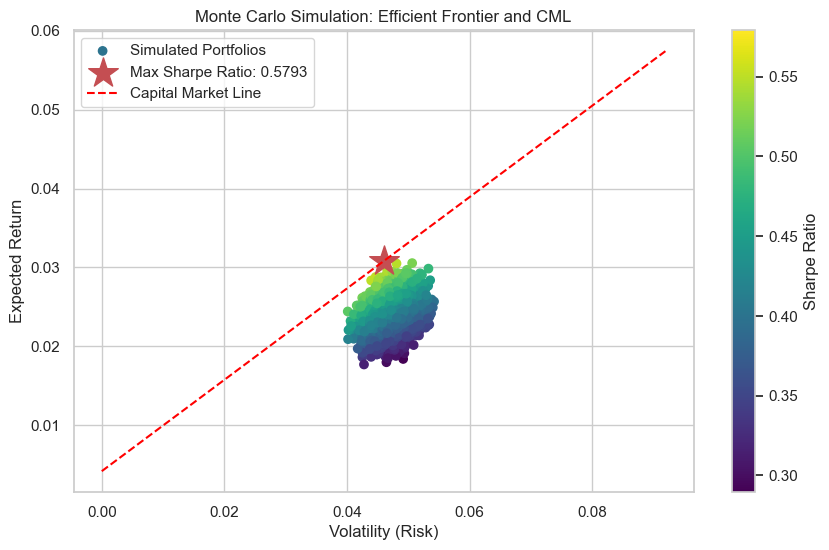

In [339]:
model.generate_efficient_frontier()

In [340]:
model.print_best_portfolio_summary()

Best portfolio weights:
RELIANCE.NS: 0.0351
TCS.NS: 0.0278
HDFCBANK.NS: 0.0007
INFY.NS: 0.0094
HINDUNILVR.NS: 0.0159
ICICIBANK.NS: 0.0245
BHARTIARTL.NS: 0.0262
ITC.NS: 0.0241
KOTAKBANK.NS: 0.0028
LT.NS: 0.0298
GODREJCP.NS: 0.0264
FEDERALBNK.NS: 0.0084
TATAPOWER.NS: 0.0195
APOLLOHOSP.NS: 0.0101
ASHOKLEY.NS: 0.0270
MUTHOOTFIN.NS: 0.0085
JUBLFOOD.NS: 0.0008
BIOCON.NS: 0.0170
CROMPTON.NS: 0.0017
VMART.NS: 0.0017
KEC.NS: 0.0075
BAJAJELEC.NS: 0.0284
CHALET.NS: 0.0371
DIXON.NS: 0.0202
ELGIEQUIP.NS: 0.0267
FSL.NS: 0.0020
GRANULES.NS: 0.0311
HIMATSEIDE.NS: 0.0177
IDFC.NS: 0.0190
L&TFH.NS: 0.0316
MANAPPURAM.NS: 0.0046
NBCC.NS: 0.0179
OBEROIRLTY.NS: 0.0212
RAYMOND.NS: 0.0242
SUNTECK.NS: 0.0279
TV18BRDCST.NS: 0.0249
UNIONBANK.NS: 0.0334
VBL.NS: 0.0387
YESBANK.NS: 0.0007
ZEEL.NS: 0.0163
AJANTPHARM.NS: 0.0161
BLUESTARCO.NS: 0.0296
CENTURYPLY.NS: 0.0114
DALMIASUG.NS: 0.0006
EMAMILTD.NS: 0.0029
FINCABLES.NS: 0.0364
GMDCLTD.NS: 0.0362
HCC.NS: 0.0101
ITDCEM.NS: 0.0369
JSL.NS: 0.0345
KSCL.NS: 0.0271
LUXI

In [341]:
model.get_min_variance_portfolio()

Global Minimum Variance Portfolio:
Expected Return: 0.0200
Risk (Volatility): 0.2003
Weights:
RELIANCE.NS: 0.0059
TCS.NS: 0.0331
HDFCBANK.NS: 0.0425
INFY.NS: 0.0150
HINDUNILVR.NS: 0.0165
ICICIBANK.NS: 0.0038
BHARTIARTL.NS: 0.0289
ITC.NS: 0.0249
KOTAKBANK.NS: 0.0018
LT.NS: 0.0339
GODREJCP.NS: 0.0374
FEDERALBNK.NS: 0.0409
TATAPOWER.NS: 0.0246
APOLLOHOSP.NS: 0.0204
ASHOKLEY.NS: 0.0395
MUTHOOTFIN.NS: 0.0180
JUBLFOOD.NS: 0.0295
BIOCON.NS: 0.0277
CROMPTON.NS: 0.0168
VMART.NS: 0.0039
KEC.NS: 0.0010
BAJAJELEC.NS: 0.0193
CHALET.NS: 0.0217
DIXON.NS: 0.0371
ELGIEQUIP.NS: 0.0187
FSL.NS: 0.0127
GRANULES.NS: 0.0208
HIMATSEIDE.NS: 0.0107
IDFC.NS: 0.0041
L&TFH.NS: 0.0051
MANAPPURAM.NS: 0.0144
NBCC.NS: 0.0006
OBEROIRLTY.NS: 0.0099
RAYMOND.NS: 0.0355
SUNTECK.NS: 0.0106
TV18BRDCST.NS: 0.0050
UNIONBANK.NS: 0.0428
VBL.NS: 0.0280
YESBANK.NS: 0.0027
ZEEL.NS: 0.0028
AJANTPHARM.NS: 0.0276
BLUESTARCO.NS: 0.0243
CENTURYPLY.NS: 0.0031
DALMIASUG.NS: 0.0101
EMAMILTD.NS: 0.0419
FINCABLES.NS: 0.0258
GMDCLTD.NS: 0.019

(0.02441403835426536,
 0.2002869439229097,
 {'RELIANCE.NS': 0.00591546381689457,
  'TCS.NS': 0.03307031756695078,
  'HDFCBANK.NS': 0.04249190923792199,
  'INFY.NS': 0.014955062328376154,
  'HINDUNILVR.NS': 0.016507561491867575,
  'ICICIBANK.NS': 0.0037648491227709586,
  'BHARTIARTL.NS': 0.028906437578793125,
  'ITC.NS': 0.024894095341977986,
  'KOTAKBANK.NS': 0.0018180285008654706,
  'LT.NS': 0.03389558027150214,
  'GODREJCP.NS': 0.03736855857864356,
  'FEDERALBNK.NS': 0.04087590234605334,
  'TATAPOWER.NS': 0.024591435474877556,
  'APOLLOHOSP.NS': 0.02039380168389254,
  'ASHOKLEY.NS': 0.03947979583610156,
  'MUTHOOTFIN.NS': 0.017965759054836383,
  'JUBLFOOD.NS': 0.029535056962921476,
  'BIOCON.NS': 0.027728964720057286,
  'CROMPTON.NS': 0.016770027572704568,
  'VMART.NS': 0.003915365279938709,
  'KEC.NS': 0.0009650099759670147,
  'BAJAJELEC.NS': 0.019296908569845984,
  'CHALET.NS': 0.021683522758697393,
  'DIXON.NS': 0.03707087400520166,
  'ELGIEQUIP.NS': 0.01867388826735103,
  'FSL.NS

In [342]:
model1= MonteCarloOptimization(returns=monthly_returns, risk_free_rate=0.05,allow_shortselling=True)

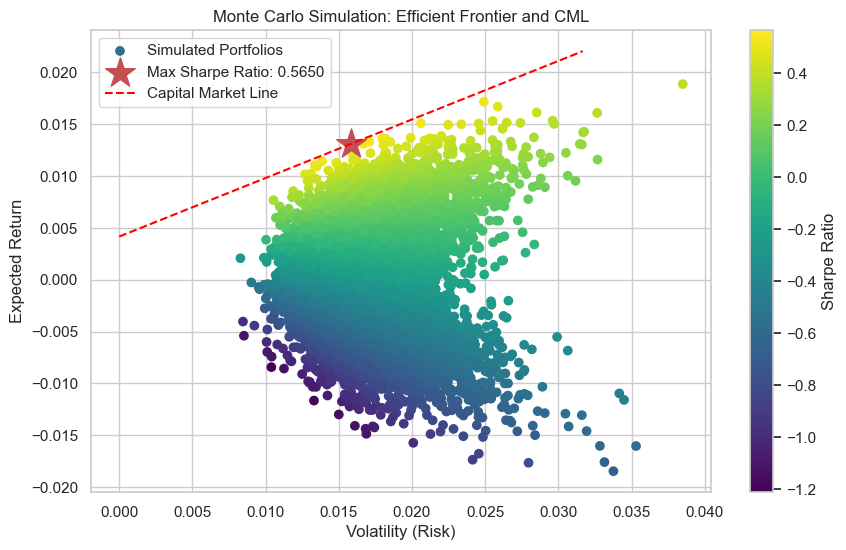

In [343]:
model1.generate_efficient_frontier()

In [344]:
#abs mod weights sum to 1
(np.abs(model1.best_weights)).sum()

1.0000000000000002

In [345]:
model1.print_best_portfolio_summary()

Best portfolio weights:
RELIANCE.NS: 0.0097
TCS.NS: -0.0046
HDFCBANK.NS: 0.0128
INFY.NS: 0.0087
HINDUNILVR.NS: -0.0370
ICICIBANK.NS: 0.0231
BHARTIARTL.NS: 0.0113
ITC.NS: -0.0054
KOTAKBANK.NS: -0.0248
LT.NS: -0.0266
GODREJCP.NS: 0.0328
FEDERALBNK.NS: -0.0196
TATAPOWER.NS: 0.0239
APOLLOHOSP.NS: -0.0118
ASHOKLEY.NS: -0.0264
MUTHOOTFIN.NS: 0.0220
JUBLFOOD.NS: -0.0300
BIOCON.NS: -0.0341
CROMPTON.NS: 0.0109
VMART.NS: 0.0138
KEC.NS: -0.0071
BAJAJELEC.NS: -0.0278
CHALET.NS: 0.0077
DIXON.NS: 0.0344
ELGIEQUIP.NS: 0.0073
FSL.NS: 0.0371
GRANULES.NS: 0.0150
HIMATSEIDE.NS: -0.0285
IDFC.NS: 0.0175
L&TFH.NS: -0.0261
MANAPPURAM.NS: -0.0012
NBCC.NS: -0.0168
OBEROIRLTY.NS: 0.0315
RAYMOND.NS: 0.0143
SUNTECK.NS: 0.0306
TV18BRDCST.NS: 0.0030
UNIONBANK.NS: 0.0278
VBL.NS: 0.0343
YESBANK.NS: -0.0036
ZEEL.NS: 0.0029
AJANTPHARM.NS: 0.0304
BLUESTARCO.NS: 0.0150
CENTURYPLY.NS: -0.0160
DALMIASUG.NS: 0.0028
EMAMILTD.NS: -0.0377
FINCABLES.NS: 0.0217
GMDCLTD.NS: 0.0324
HCC.NS: 0.0335
ITDCEM.NS: -0.0097
JSL.NS: 0.0003


In [346]:
model1.get_min_variance_portfolio()

Global Minimum Variance Portfolio:
Expected Return: 0.0200
Risk (Volatility): 0.0910
Weights:
RELIANCE.NS: 0.0206
TCS.NS: -0.0013
HDFCBANK.NS: -0.0310
INFY.NS: 0.0266
HINDUNILVR.NS: -0.0327
ICICIBANK.NS: 0.0321
BHARTIARTL.NS: -0.0081
ITC.NS: 0.0297
KOTAKBANK.NS: 0.0299
LT.NS: 0.0137
GODREJCP.NS: -0.0123
FEDERALBNK.NS: 0.0187
TATAPOWER.NS: -0.0205
APOLLOHOSP.NS: -0.0065
ASHOKLEY.NS: 0.0017
MUTHOOTFIN.NS: -0.0312
JUBLFOOD.NS: 0.0208
BIOCON.NS: -0.0038
CROMPTON.NS: -0.0013
VMART.NS: -0.0144
KEC.NS: -0.0115
BAJAJELEC.NS: 0.0022
CHALET.NS: 0.0156
DIXON.NS: 0.0067
ELGIEQUIP.NS: -0.0199
FSL.NS: -0.0305
GRANULES.NS: 0.0244
HIMATSEIDE.NS: 0.0228
IDFC.NS: -0.0176
L&TFH.NS: 0.0124
MANAPPURAM.NS: -0.0283
NBCC.NS: 0.0304
OBEROIRLTY.NS: 0.0325
RAYMOND.NS: -0.0064
SUNTECK.NS: -0.0186
TV18BRDCST.NS: -0.0316
UNIONBANK.NS: 0.0336
VBL.NS: -0.0263
YESBANK.NS: -0.0088
ZEEL.NS: -0.0256
AJANTPHARM.NS: -0.0311
BLUESTARCO.NS: -0.0270
CENTURYPLY.NS: 0.0269
DALMIASUG.NS: -0.0123
EMAMILTD.NS: -0.0200
FINCABLES.NS

(0.0020755314416759096,
 0.09101856932370031,
 {'RELIANCE.NS': 0.02055665213439788,
  'TCS.NS': -0.0012567431832372002,
  'HDFCBANK.NS': -0.031019007423319034,
  'INFY.NS': 0.026585710210660547,
  'HINDUNILVR.NS': -0.03268074966361102,
  'ICICIBANK.NS': 0.03214834628241328,
  'BHARTIARTL.NS': -0.008059752632880422,
  'ITC.NS': 0.029684489371181948,
  'KOTAKBANK.NS': 0.02987655106658714,
  'LT.NS': 0.01368857822238971,
  'GODREJCP.NS': -0.012341027719156517,
  'FEDERALBNK.NS': 0.018669066137936303,
  'TATAPOWER.NS': -0.02050749457604819,
  'APOLLOHOSP.NS': -0.006532218898913109,
  'ASHOKLEY.NS': 0.0016632085693424298,
  'MUTHOOTFIN.NS': -0.031222571084507336,
  'JUBLFOOD.NS': 0.020798432008023063,
  'BIOCON.NS': -0.0037749743055532897,
  'CROMPTON.NS': -0.0013372257773278176,
  'VMART.NS': -0.014440995339395085,
  'KEC.NS': -0.011517985248023293,
  'BAJAJELEC.NS': 0.0022357250497198975,
  'CHALET.NS': 0.015611184680807176,
  'DIXON.NS': 0.006700133878447777,
  'ELGIEQUIP.NS': -0.0198616

In [347]:
model2= QuadraticOptimisation(returns=monthly_returns, risk_free_rate=0.05,allow_shortselling=False)

In [348]:
model2.generate_efficient_frontier()

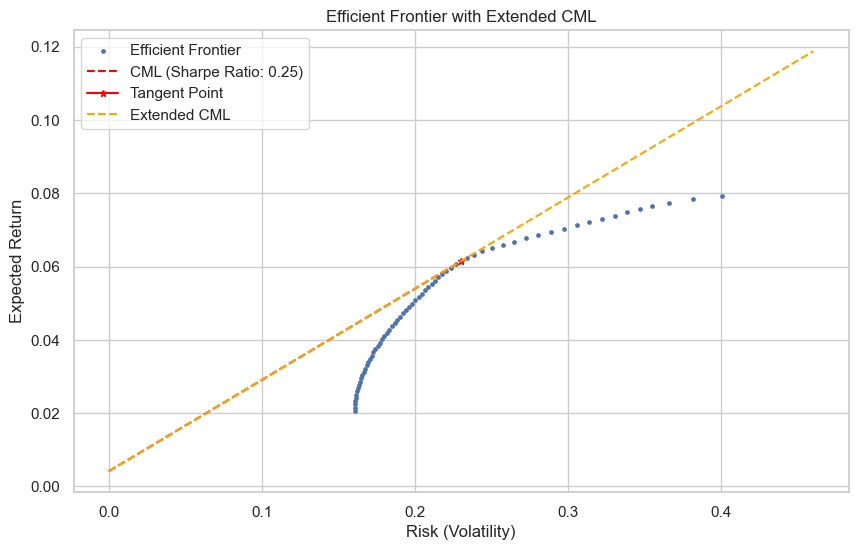

In [349]:
model2.plot_efficient_frontier()

In [350]:
model2.best_weights.sum()

1.0000000000000926

In [351]:
model2.get_min_variance_portfolio()

Global Minimum Variance Portfolio:
Expected Return: 0.0200
Risk (Volatility): 0.4008
Weights:
RELIANCE.NS: 0.0000
TCS.NS: 0.0215
HDFCBANK.NS: 0.0592
INFY.NS: 0.0816
HINDUNILVR.NS: 0.0602
ICICIBANK.NS: 0.0000
BHARTIARTL.NS: 0.1471
ITC.NS: 0.1373
KOTAKBANK.NS: 0.0000
LT.NS: 0.0000
GODREJCP.NS: 0.0000
FEDERALBNK.NS: 0.0679
TATAPOWER.NS: 0.0000
APOLLOHOSP.NS: 0.0000
ASHOKLEY.NS: 0.0293
MUTHOOTFIN.NS: 0.0000
JUBLFOOD.NS: 0.0000
BIOCON.NS: 0.0000
CROMPTON.NS: 0.0000
VMART.NS: 0.0000
KEC.NS: 0.1139
BAJAJELEC.NS: 0.0084
CHALET.NS: 0.0000
DIXON.NS: 0.0000
ELGIEQUIP.NS: 0.0642
FSL.NS: 0.0000
GRANULES.NS: 0.0000
HIMATSEIDE.NS: 0.0000
IDFC.NS: 0.0000
L&TFH.NS: 0.0000
MANAPPURAM.NS: 0.0000
NBCC.NS: 0.0000
OBEROIRLTY.NS: 0.0000
RAYMOND.NS: 0.0036
SUNTECK.NS: 0.0000
TV18BRDCST.NS: 0.0000
UNIONBANK.NS: 0.0000
VBL.NS: 0.0324
YESBANK.NS: 0.0000
ZEEL.NS: 0.0000
AJANTPHARM.NS: 0.0000
BLUESTARCO.NS: 0.0520
CENTURYPLY.NS: 0.0000
DALMIASUG.NS: 0.0000
EMAMILTD.NS: 0.0571
FINCABLES.NS: 0.0000
GMDCLTD.NS: 0.000

(0.01080682146840614,
 0.4007827476453864,
 {'RELIANCE.NS': 1.2480523694471964e-07,
  'TCS.NS': 0.02145156880270777,
  'HDFCBANK.NS': 0.059159578250574704,
  'INFY.NS': 0.08160984844495527,
  'HINDUNILVR.NS': 0.060225071061224246,
  'ICICIBANK.NS': 3.697410543130692e-08,
  'BHARTIARTL.NS': 0.1470547819551925,
  'ITC.NS': 0.1372552362345267,
  'KOTAKBANK.NS': 9.291238898383356e-08,
  'LT.NS': 3.047304944585873e-08,
  'GODREJCP.NS': 4.710054098474556e-08,
  'FEDERALBNK.NS': 0.06791896542748162,
  'TATAPOWER.NS': 1.5184178117017796e-08,
  'APOLLOHOSP.NS': 1.985990195299842e-07,
  'ASHOKLEY.NS': 0.029290932905436162,
  'MUTHOOTFIN.NS': 2.7505506176402532e-08,
  'JUBLFOOD.NS': 3.827306939963547e-08,
  'BIOCON.NS': 3.731555470799761e-08,
  'CROMPTON.NS': 7.233099456285165e-08,
  'VMART.NS': 2.0568847453362597e-08,
  'KEC.NS': 0.11391313249634251,
  'BAJAJELEC.NS': 0.00842798557687874,
  'CHALET.NS': 5.1223465335057125e-08,
  'DIXON.NS': 3.985545414757706e-08,
  'ELGIEQUIP.NS': 0.064156431458